# Plotting QC stats for INFLAREs

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 221900 × 18485
    var: 'gene_ids-0-0-query', 'feature_type-0-0-query', 'mito-0-0-query', 'ribo-0-0-query', 'hb-0-0-query', 'n_counts-0-0-query', 'n_counts_raw-0-0-query', 'n_counts_spliced-0-0-query', 'n_counts_unspliced-0-0-query', 'n_cells-0-0-query', 'n_cells_raw-0-0-query', 'n_cells_spliced-0-0-query', 'n_cells_unspliced-0-0-query', 'cc-0-0-query', 'ig-0-0-query', 'tcr-0-0-query', 'gene_id-1-0-query', 'mt-1-0-query', 'ensmbl_id-colon-1-0-query', 'n_cells_by_counts-colon-1-0-query', 'mean_counts-colon-1-0-query', 'pct_dropout_by_counts-colon-1-0-query', 'total_counts-colon-1-0-query', 'n_cells_by_counts-ileum-1-0-query', 'mean_counts-ileum-1-0-query', 'pct_dropout_by_counts-ileum-1-0-query', 'total_counts-ileum-1-0-query', 'gene_ids-reference', 'feature_type-reference', 'mito-reference', 'ribo-reference', 'hb-reference', 'n_counts-reference', 'n_counts_raw-reference', 'n_counts_spliced-reference', 'n_counts_unspliced-reference', 'n_cells-referen

In [4]:
adata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.csv',index_col=0)

/tmp/ipykernel_2590/3216520572.py:1: DtypeWarning: Columns (3,5,6,8,9,11,12,14,62,63,64,65,66,67,70,72,73,75,78,82,83,84,86,88,91,92,93,94,95,100,101,102,103,106,107,109,110,112,113,114,118,120,121,122,123,124,125,126,127,128,130,131,133,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  adata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.csv',index_col=0)


In [5]:
adata

AnnData object with n_obs × n_vars = 221900 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [6]:
adata.obs.level_3_annot.value_counts()

level_3_annot
Enterocyte                     126633
TA                              48212
Goblet                          11316
Goblet_progenitor                9011
Goblet_cycling                   6958
Epithelial_stem                  5836
Paneth                           4020
BEST4_enterocyte_colonocyte      3170
Enteroendocrine                  2563
Tuft                             2411
Surface_foveolar                  941
Microfold                         531
Mucous_gland_neck                 298
Name: count, dtype: int64

In [7]:
muc6 = adata[adata.obs.level_3_annot.isin(['Mucous_gland_neck'])].copy()

In [8]:
muc6

AnnData object with n_obs × n_vars = 298 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_splic

In [9]:
muc6.obs.disease.value_counts()

disease
crohns_disease            159
control                    74
neighbouring_inflammed     32
celiac_active              24
pediatric_IBD               8
celiac_treated              1
Name: count, dtype: int64

In [10]:
muc6.obs.donorID_unified.value_counts()

donorID_unified
D191    125
D11      59
D48      58
D164     23
D158      8
D152      8
D13       4
D42       4
D160      2
D12       1
D41       1
D214      1
D207      1
D179      1
D163      1
D161      1
Name: count, dtype: int64

In [11]:
pd.crosstab(muc6.obs.donorID_unified,muc6.obs.disease)

disease          celiac_active  celiac_treated  control  crohns_disease  \
donorID_unified                                                           
D11                          0               0       59               0   
D12                          0               0        1               0   
D13                          0               0        4               0   
D152                         0               0        0               0   
D158                         0               0        8               0   
D160                         0               0        2               0   
D161                         1               0        0               0   
D163                         0               1        0               0   
D164                        23               0        0               0   
D179                         0               0        0               0   
D191                         0               0        0              95   
D207                         0               0        0               0   
D214                         0               0        0               1   
D41                          0               0        0               1   
D42                          0               0        0               4   
D48                          0               0        0              58   

disease          neighbouring_inflammed  pediatric_IBD  
donorID_unified                                         
D11                                   0              0  
D12                                   0              0  
D13                                   0              0  
D152                                  0              8  
D158                                  0              0  
D160                                  0              0  
D161                                  0              0  
D163                                  0              0  
D164                                  0              0  
D179                                  1              0  
D191                                 30              0  
D207                                  1              0  
D214                                  0              0  
D41                                   0              0  
D42                                   0              0  
D48                                   0              0

In [12]:
plot = adata[adata.obs.level_3_annot.isin(['Mucous_gland_neck','Enterocyte','Goblet'])].copy()

In [13]:
disease_plot = plot[plot.obs.disease.isin(['crohns_disease','celiac_active','pediatric_IBD'])].copy()

In [14]:
disease_plot

AnnData object with n_obs × n_vars = 15137 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [23]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [49]:
sc.set_figure_params(
    dpi=100,dpi_save=300,
    fontsize=12,
    frameon=False,
    transparent=True,
)

In [45]:
sns.set_style(style="white")
sns.set_context(context="paper")

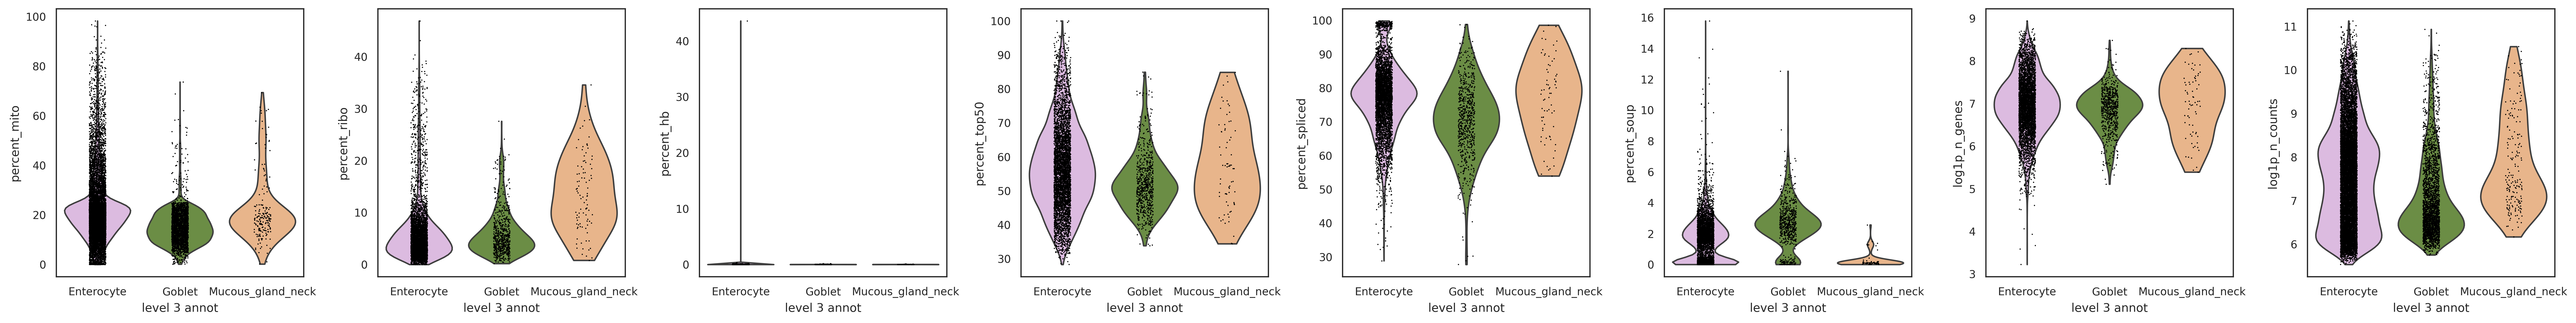

In [46]:
plt.rcParams['figure.figsize'] = [4,4]
sc.pl.violin(disease_plot,keys=['percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50','percent_spliced','percent_soup','log1p_n_genes','log1p_n_counts'],groupby='level_3_annot',multi_panel=True,palette=['#e1b5e6','#6c9939','#f7b37c'],save='INFLARE_QCstats1.pdf')

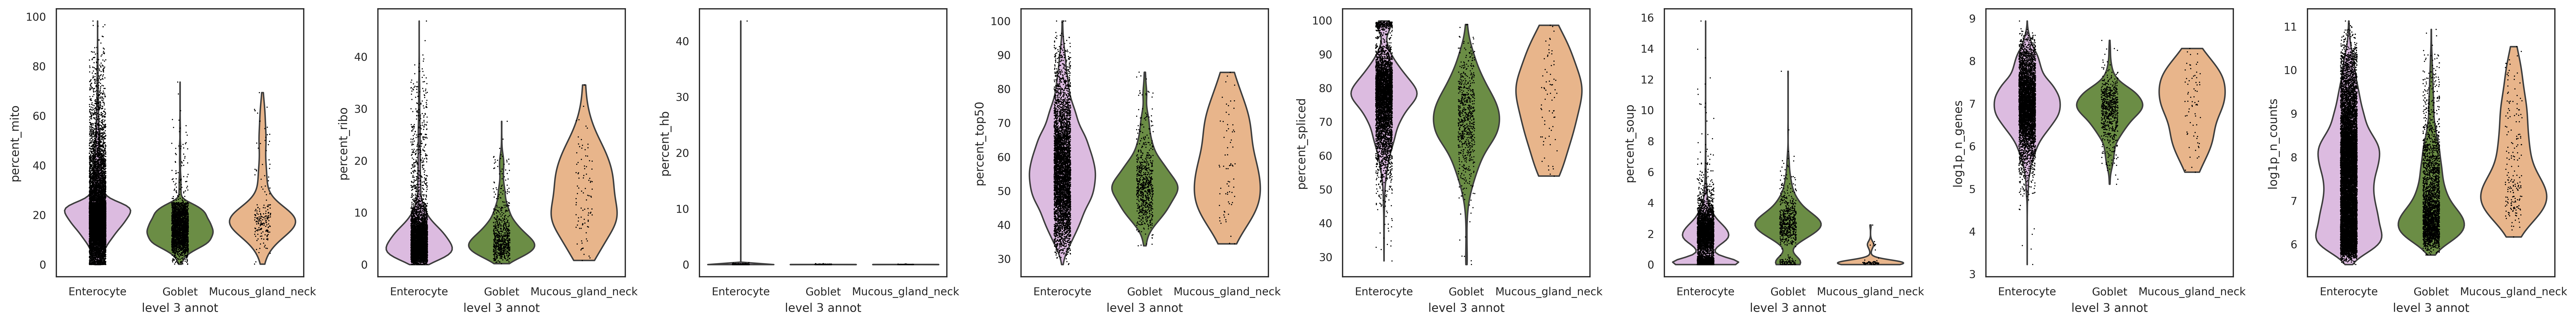

In [47]:
plt.rcParams['figure.figsize'] = [4,4]
sc.pl.violin(disease_plot,keys=['percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50','percent_spliced','percent_soup','log1p_n_genes','log1p_n_counts'],groupby='level_3_annot',multi_panel=True,palette=['#e1b5e6','#6c9939','#f7b37c'],save='INFLARE_QCstats1.png')

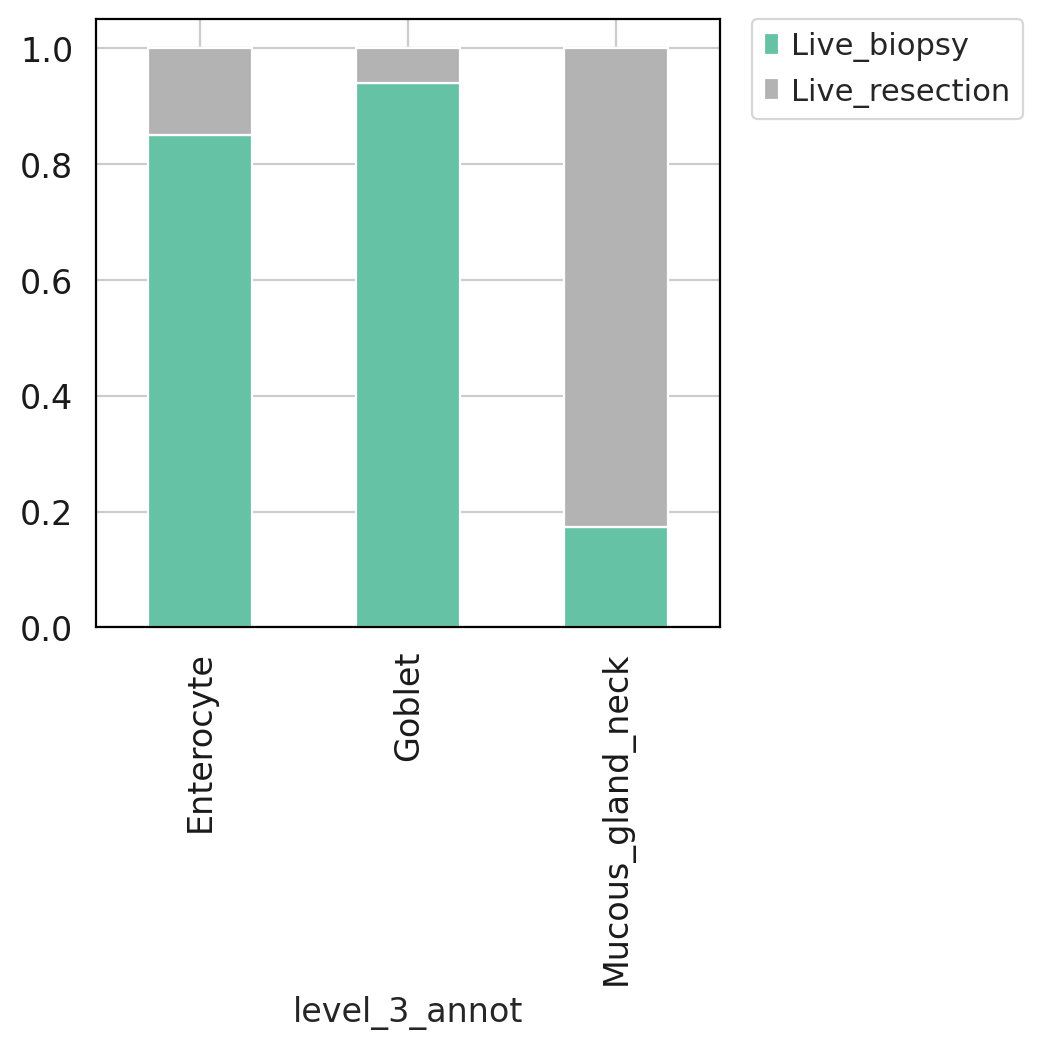

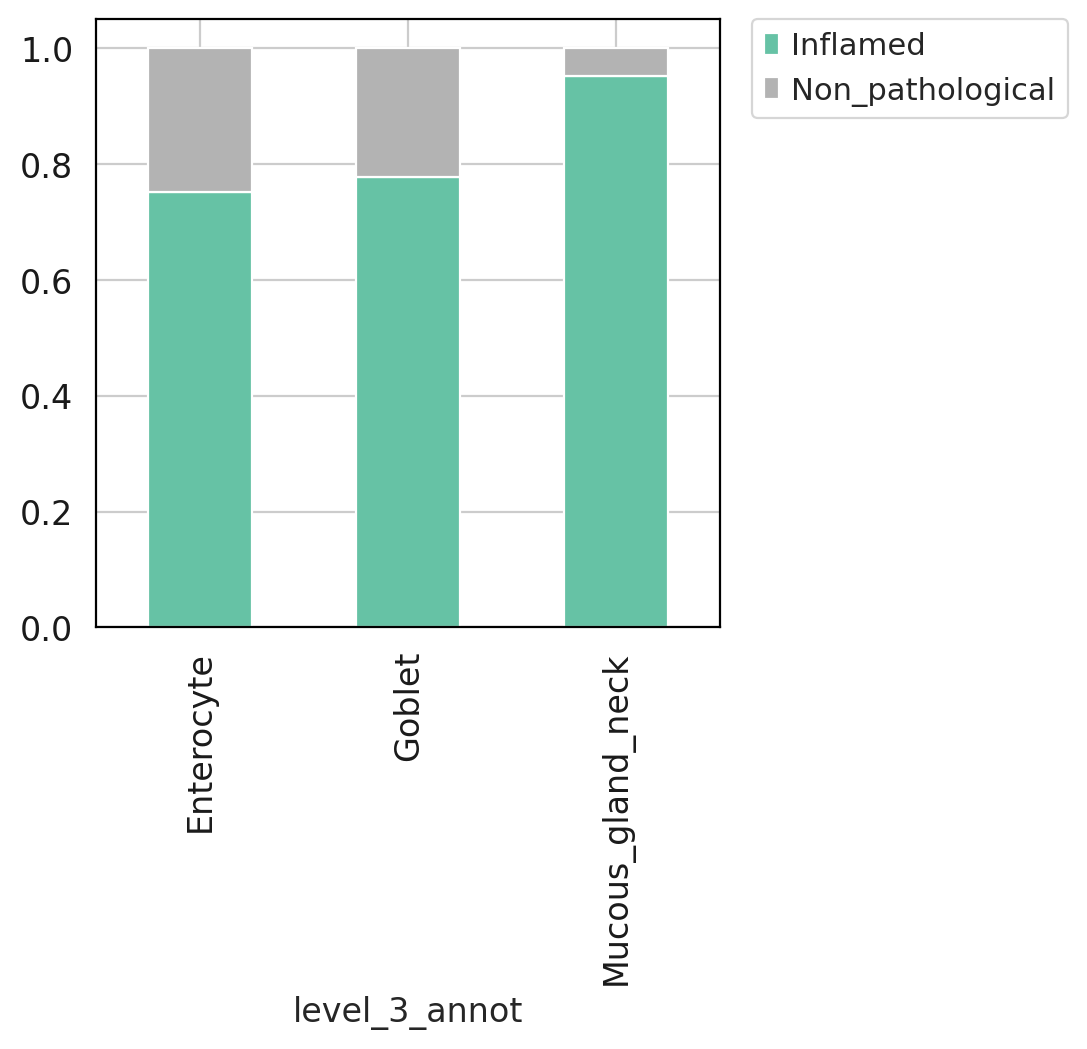

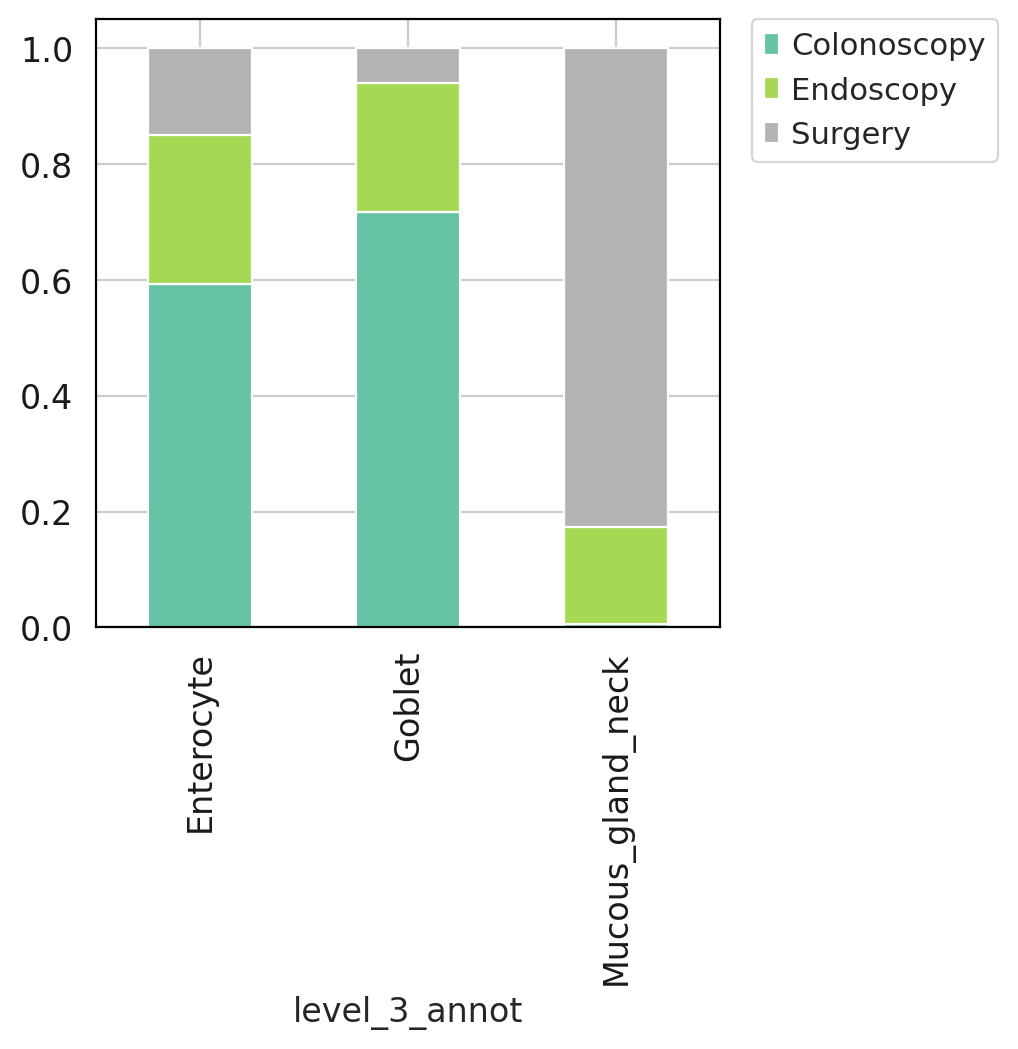

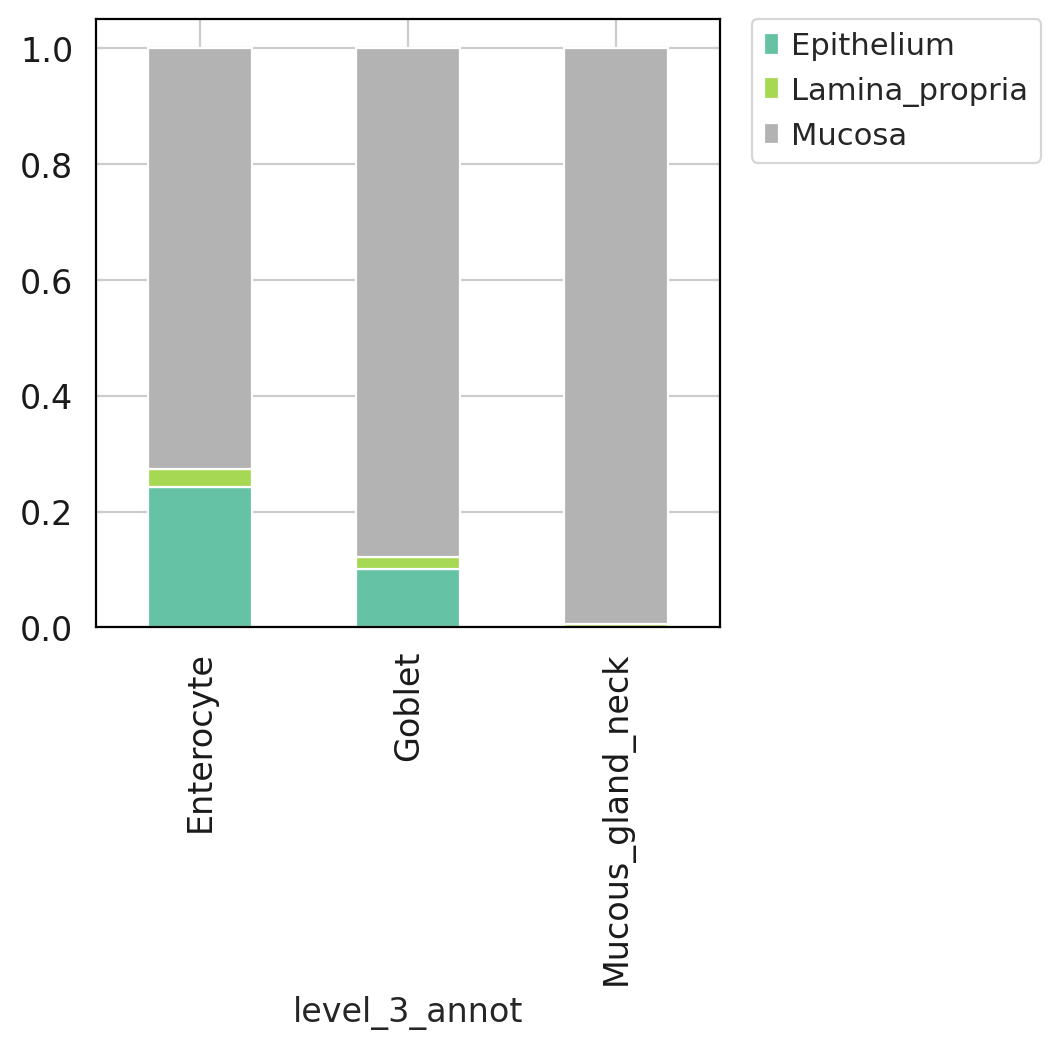

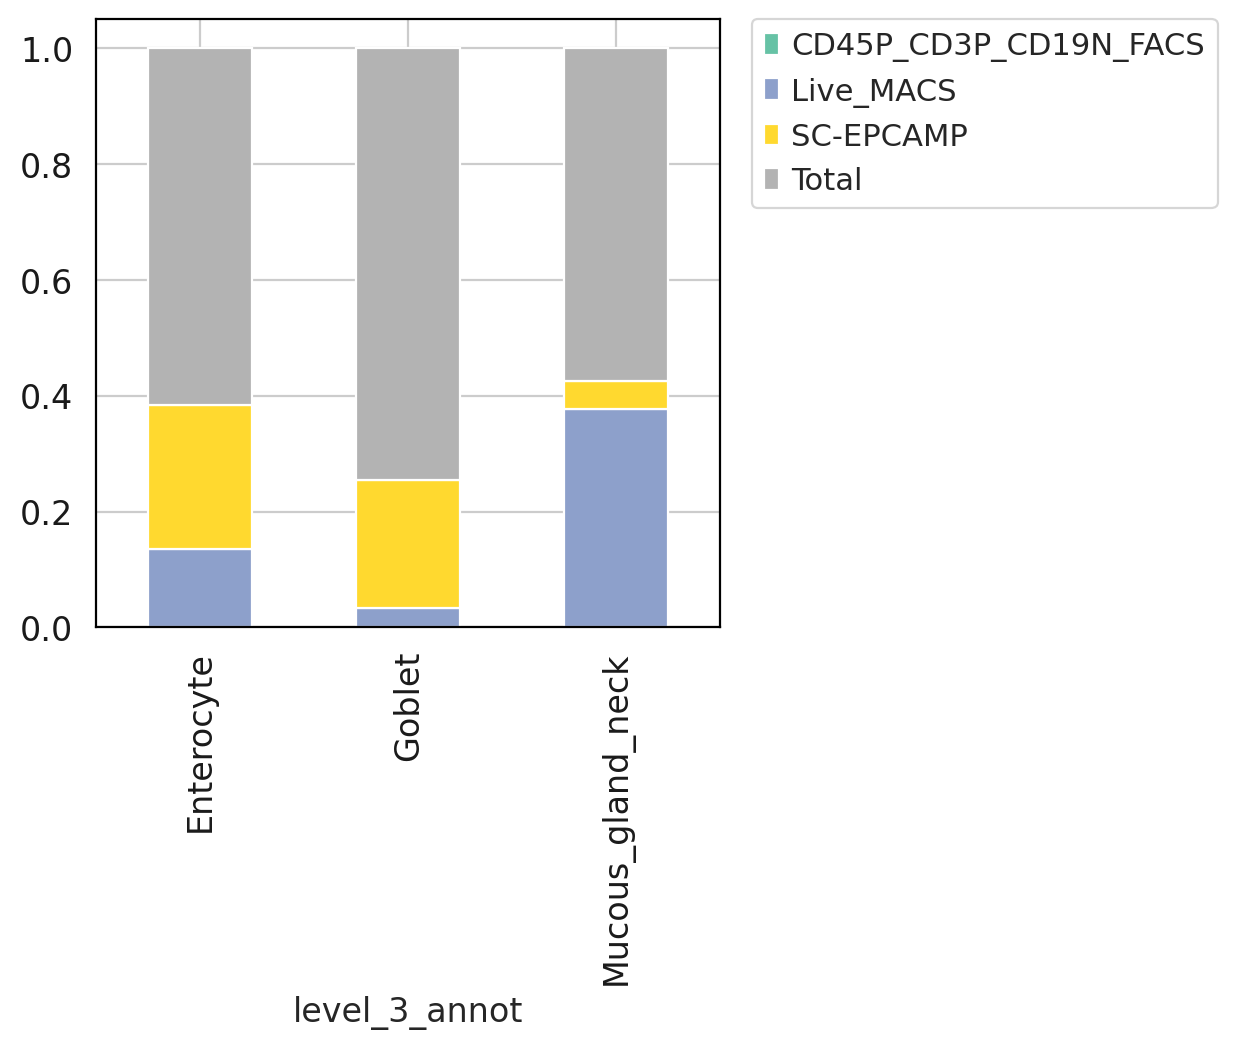

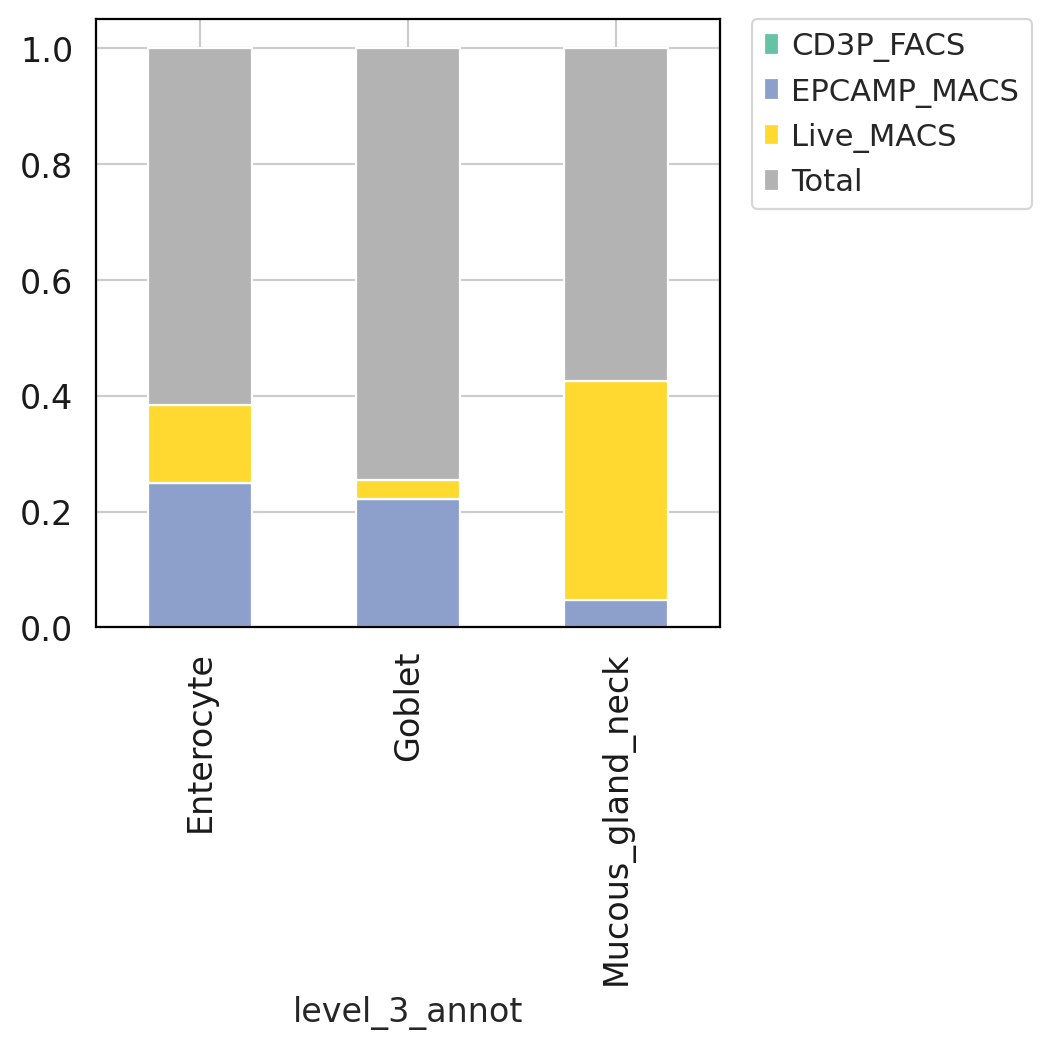

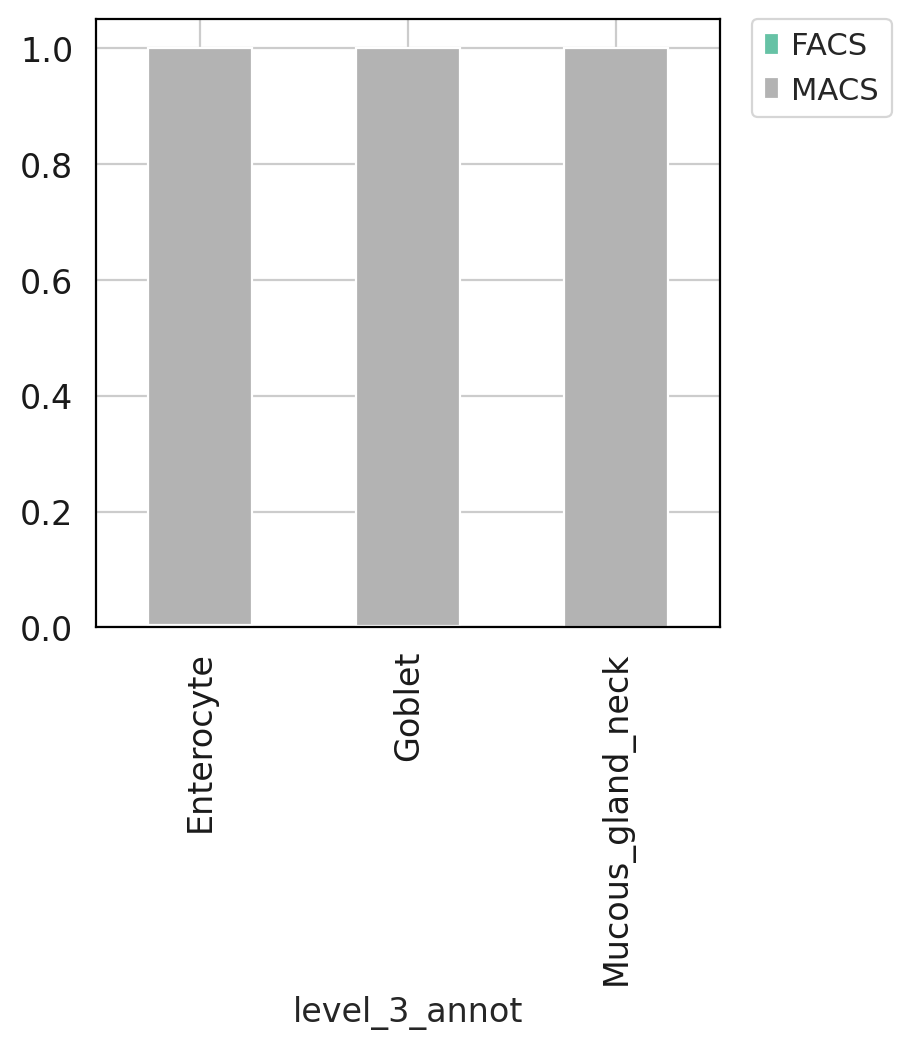

In [60]:
sampling_method_list = ['sample_type', 'sample_category', 'sample_retrieval', 'tissue_fraction', 'cell_fraction', 'cell_fraction_unified', 'cell_sorting']

for sampling_method in sampling_method_list:
    tmp = pd.crosstab(disease_plot.obs['level_3_annot'], disease_plot.obs[sampling_method], normalize='index')
    tmp.plot.bar(stacked=True,cmap='Set2').legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    #plt.savefig(f'/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/figures/INFLARE_sampling_stats_{sampling_method}.pdf')
    plt.close() 

In [61]:
sampling_method_list = ['sample_type', 'sample_category', 'sample_retrieval', 'tissue_fraction', 'cell_fraction', 'cell_fraction_unified', 'cell_sorting']

for sampling_method in sampling_method_list:
    tmp = pd.crosstab(disease_plot.obs['level_3_annot'], disease_plot.obs[sampling_method], normalize='index')
    tmp.plot.bar(stacked=True,cmap='Set2').legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.savefig(f'/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/figures/INFLARE_sampling_stats_{sampling_method}.pdf')
    plt.close() 

In [62]:
disease = adata[adata.obs.disease.isin(['crohns_disease','celiac_active','pediatric_IBD'])].copy()

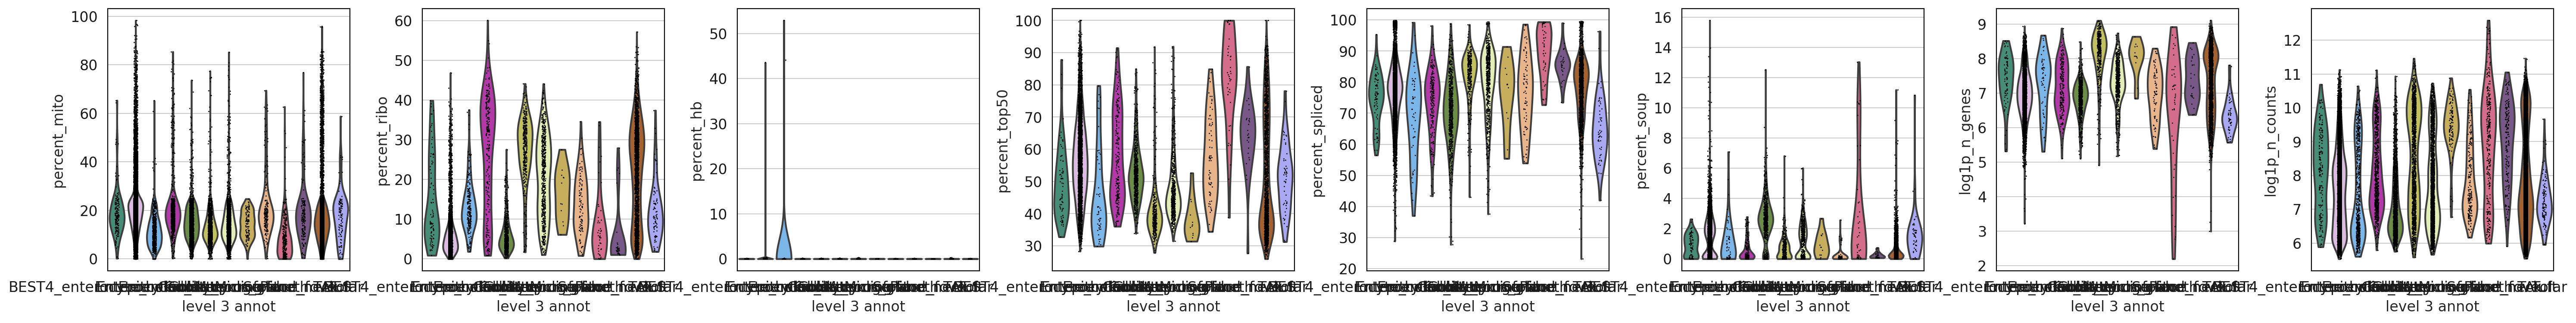

In [66]:
plt.rcParams['figure.figsize'] = [4,4]
sc.pl.violin(disease,keys=['percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50','percent_spliced','percent_soup','log1p_n_genes','log1p_n_counts'],groupby='level_3_annot',multi_panel=True,save='all_cells_QCstat.png')

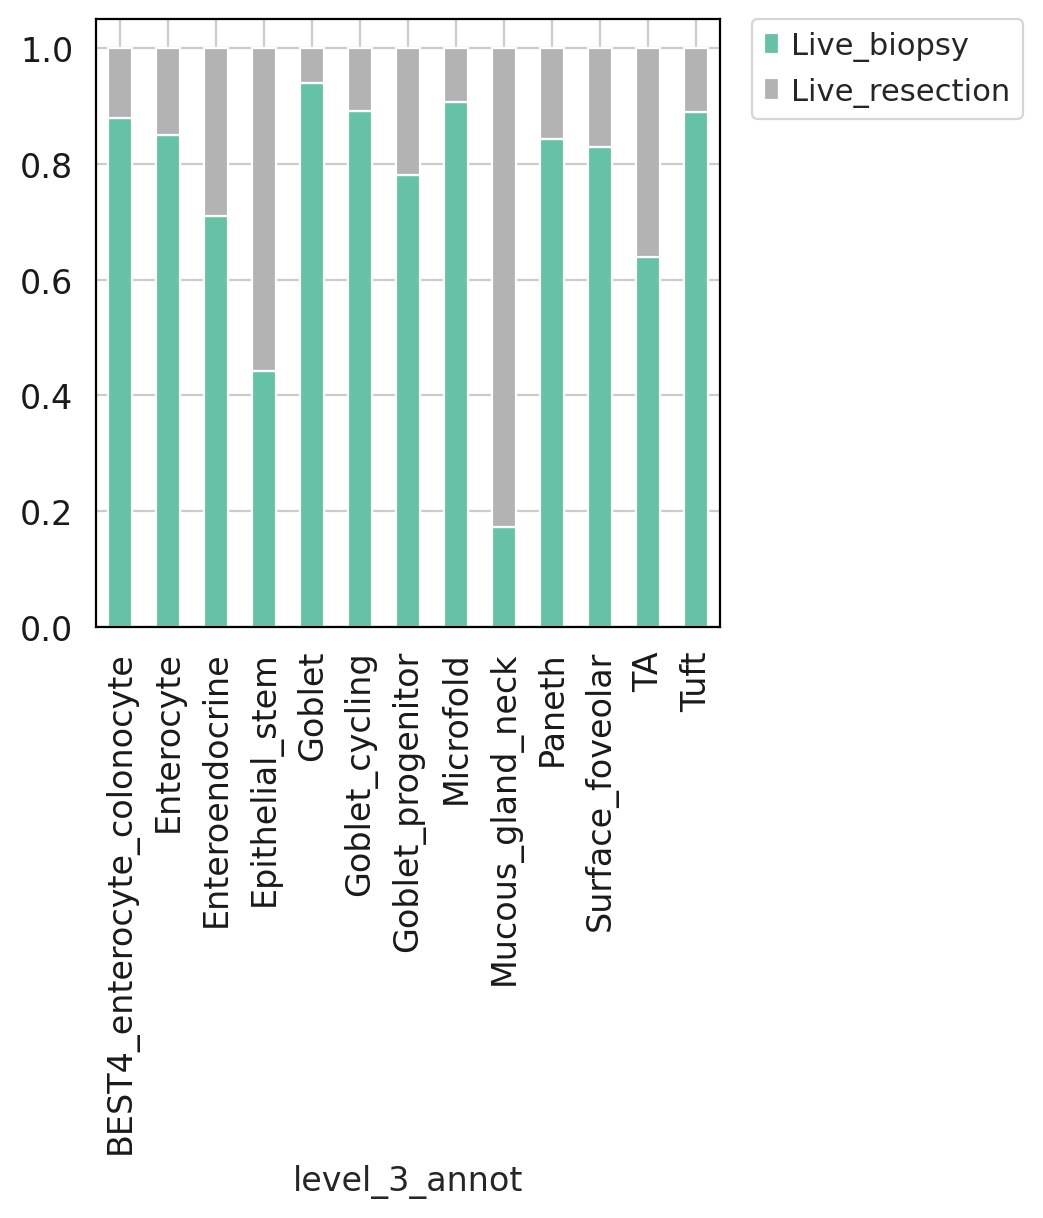

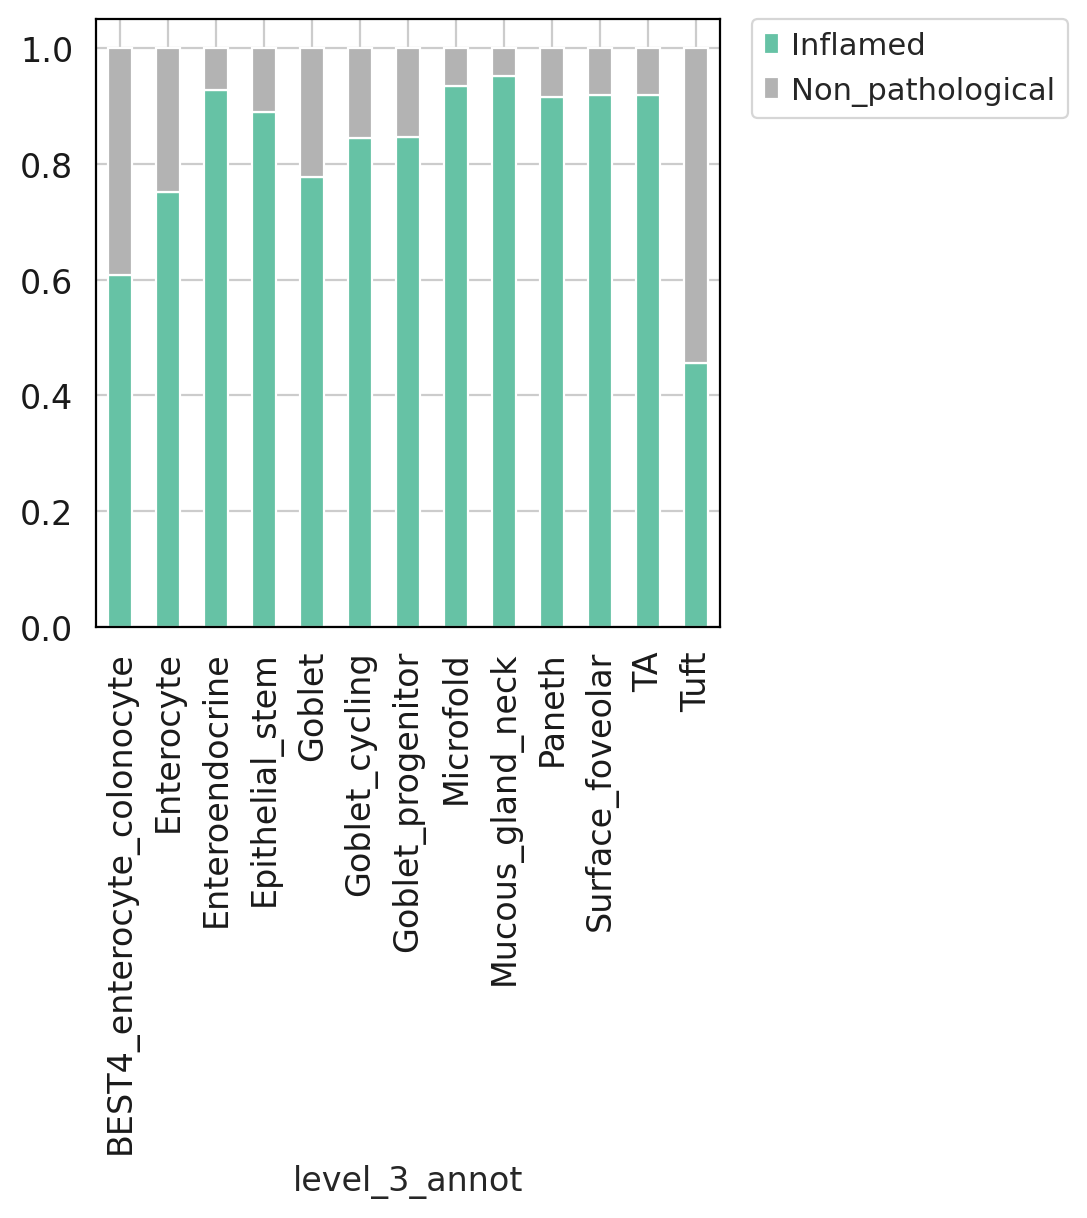

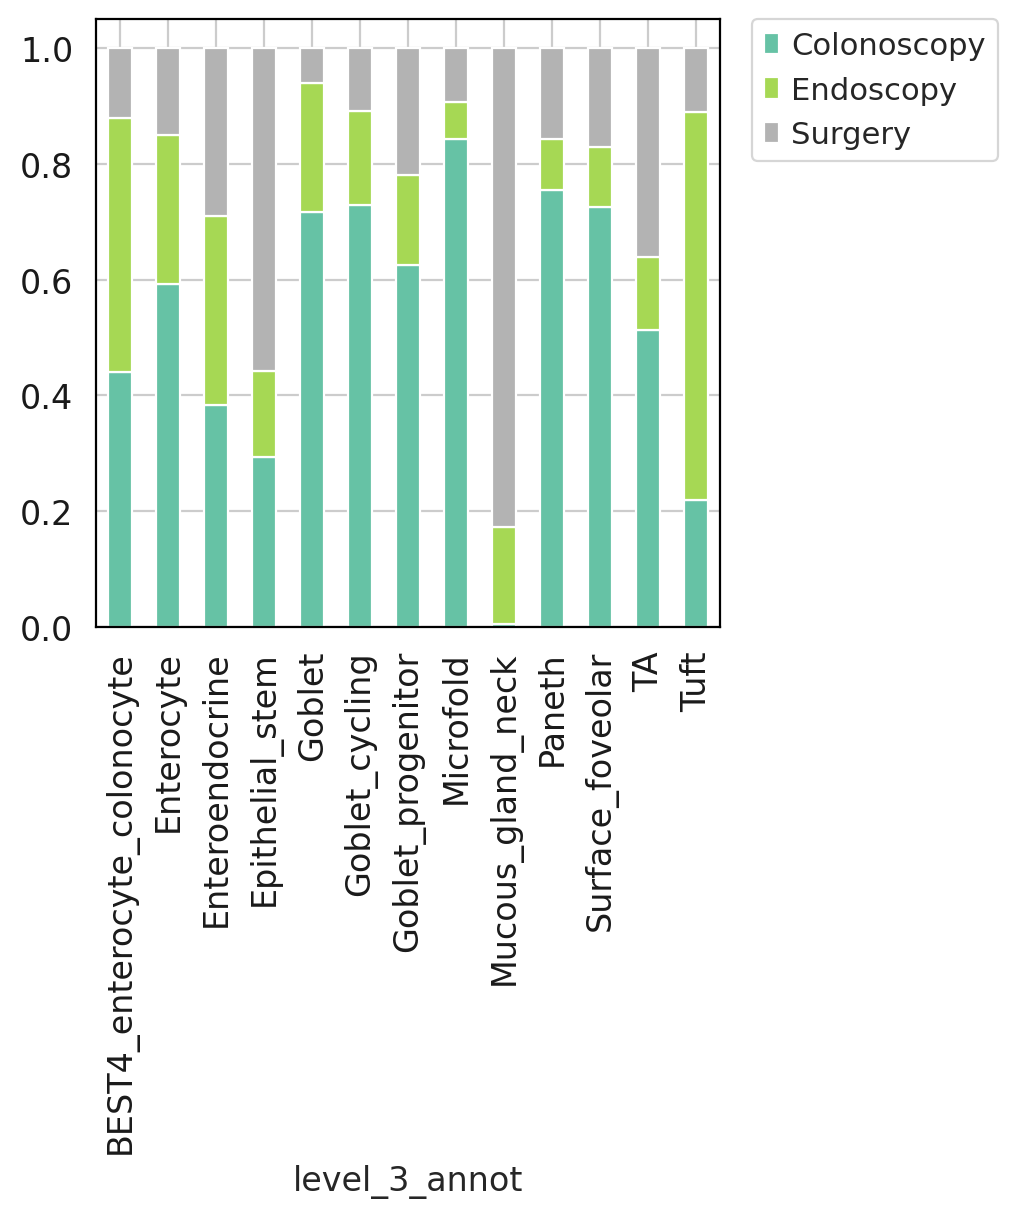

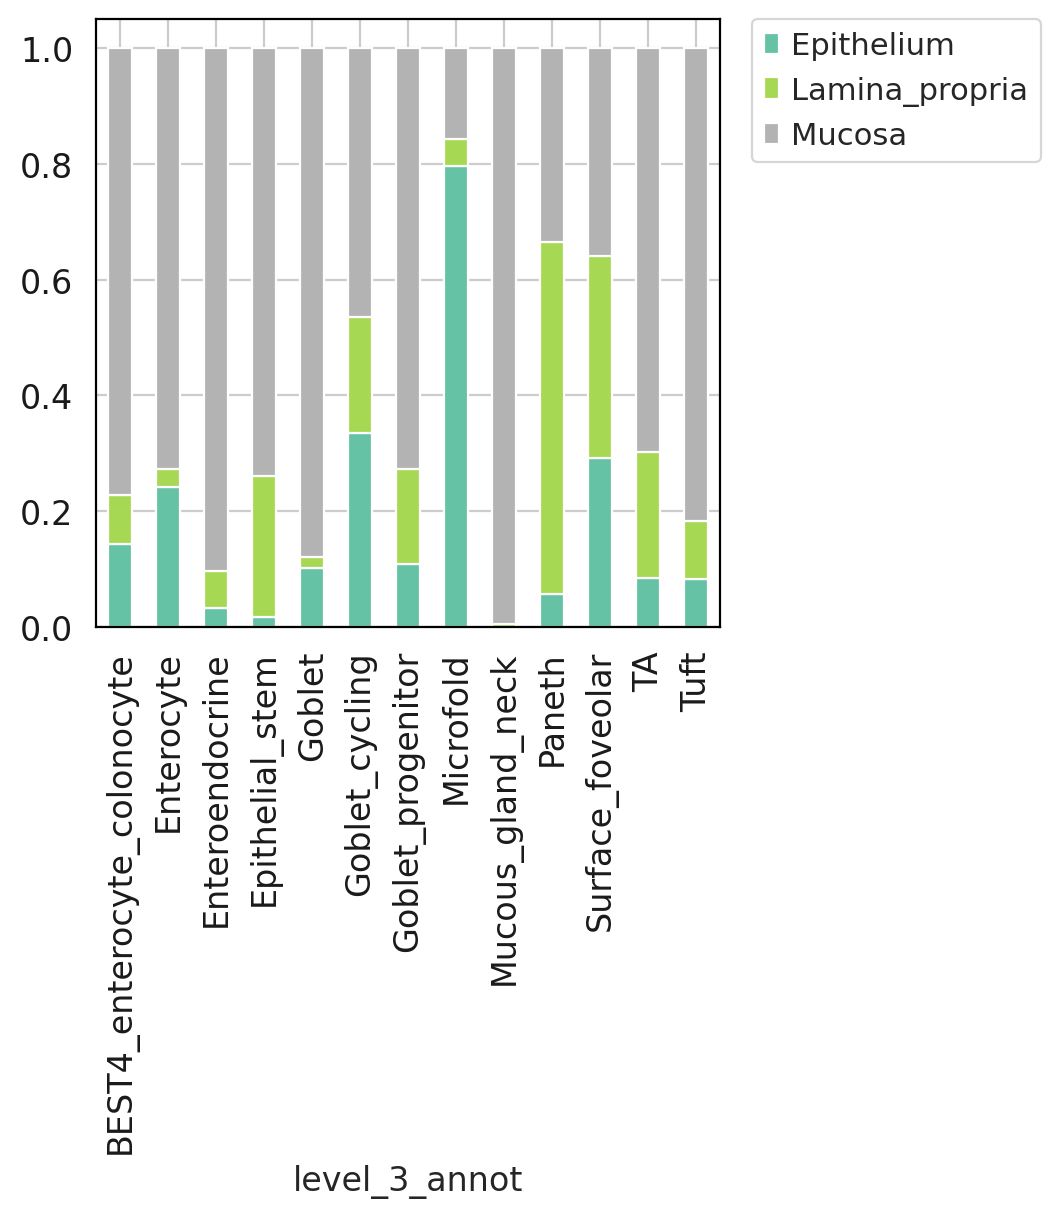

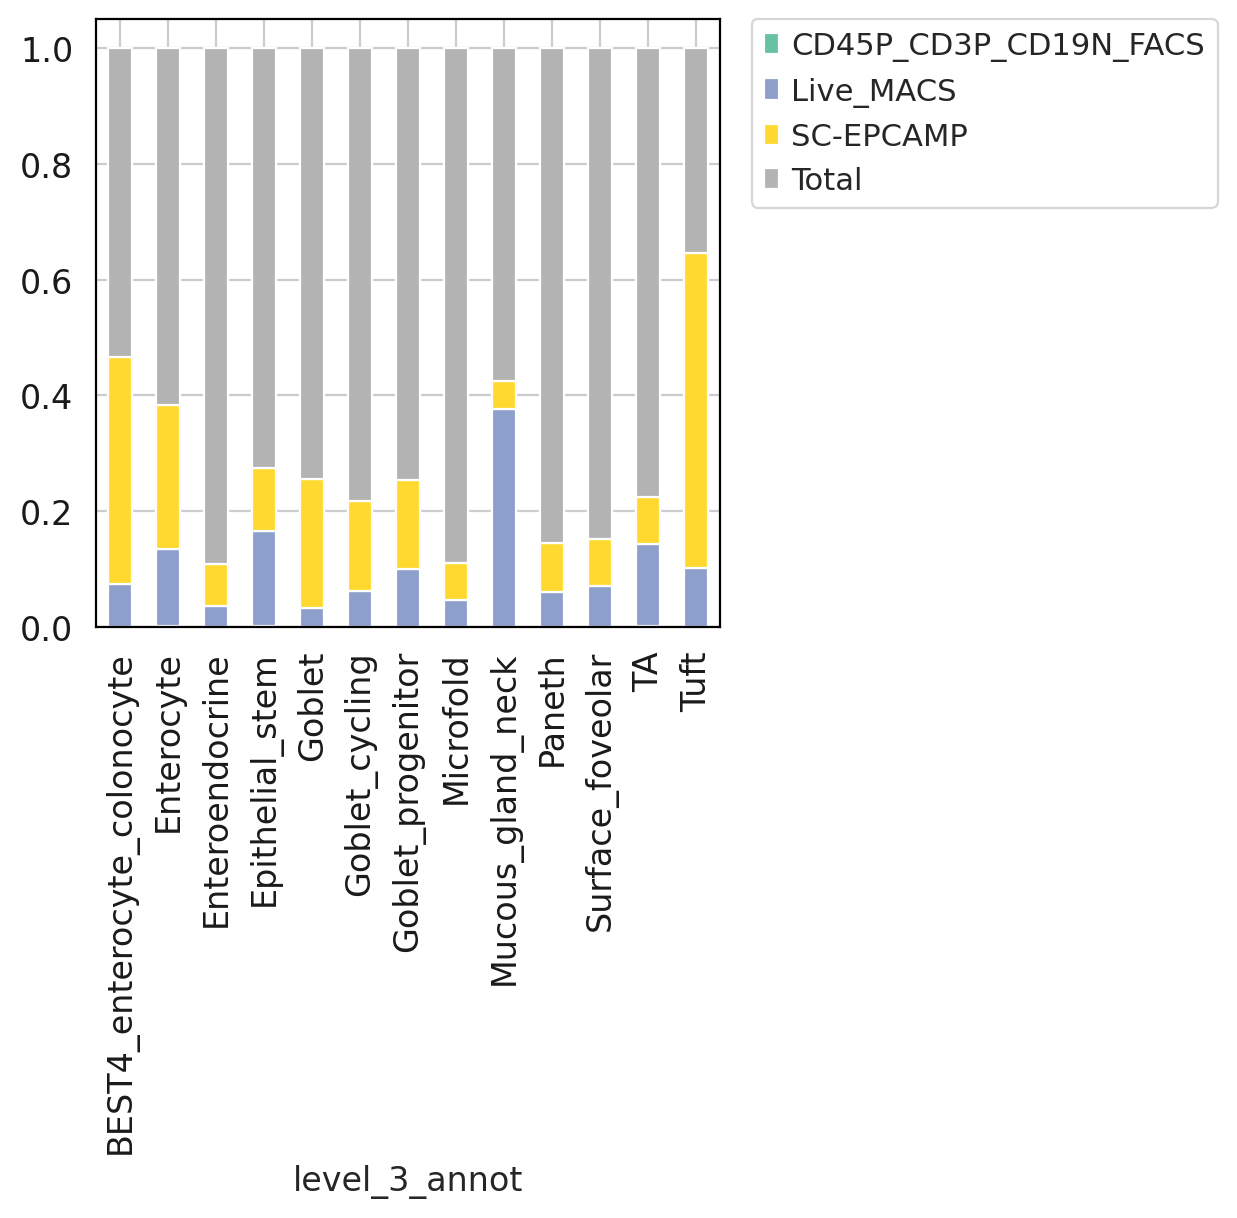

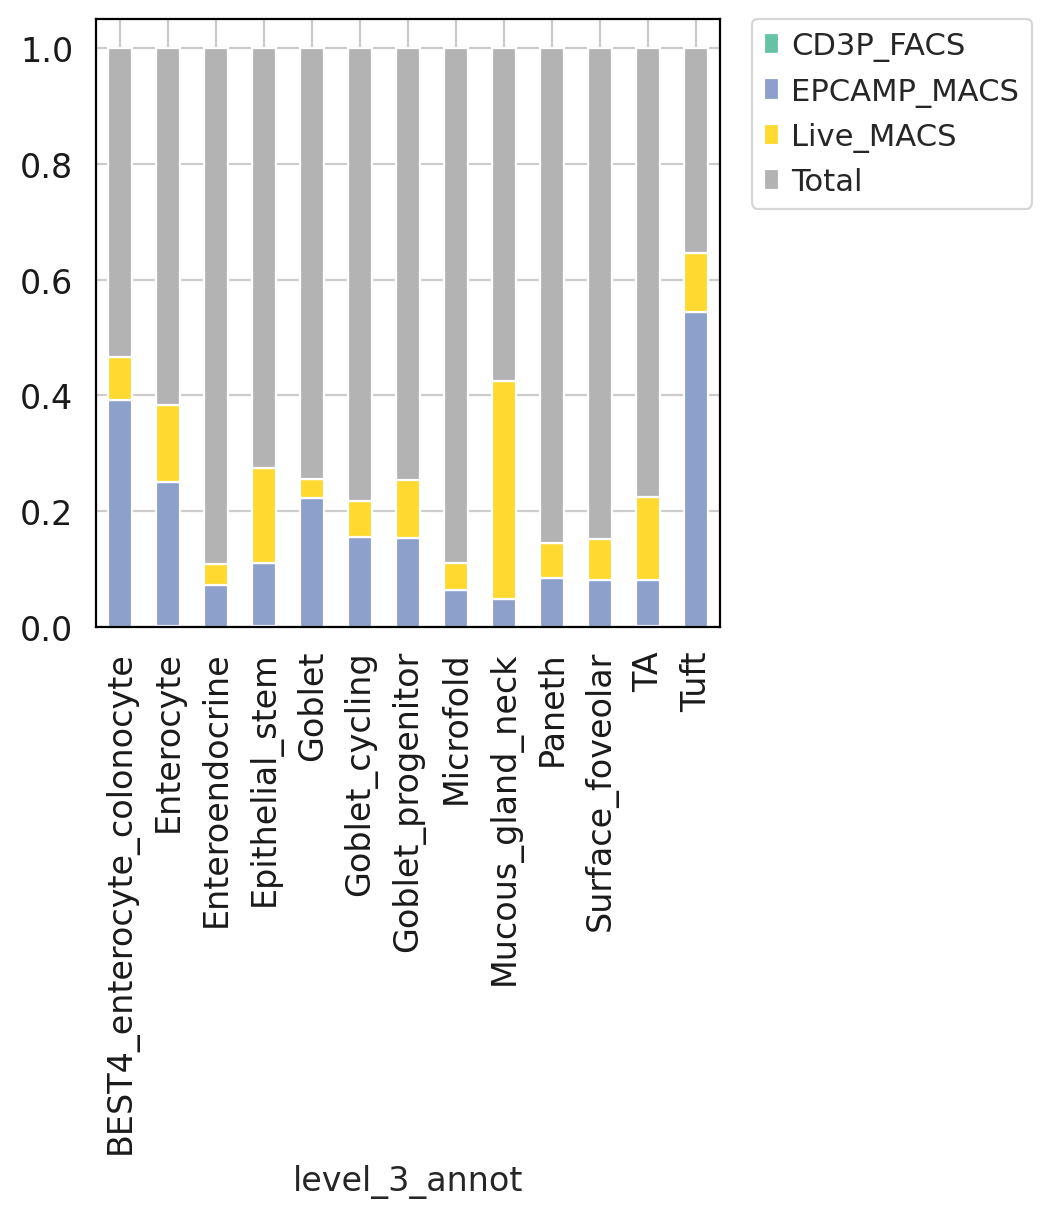

In [65]:
sampling_method_list = ['sample_type', 'sample_category', 'sample_retrieval', 'tissue_fraction', 'cell_fraction', 'cell_fraction_unified', 'cell_sorting']

for sampling_method in sampling_method_list:
    tmp = pd.crosstab(disease.obs['level_3_annot'], disease.obs[sampling_method], normalize='index')
    tmp.plot.bar(stacked=True,cmap='Set2').legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    #plt.savefig(f'/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/figures/INFLARE_sampling_stats_{sampling_method}.pdf')
    plt.close() 

In [67]:
#Extended data 6h
sampling_method_list = ['sample_type', 'sample_category', 'sample_retrieval', 'tissue_fraction', 'cell_fraction', 'cell_fraction_unified', 'cell_sorting']

for sampling_method in sampling_method_list:
    tmp = pd.crosstab(disease.obs['level_3_annot'], disease.obs[sampling_method], normalize='index')
    tmp.plot.bar(stacked=True,cmap='Set2').legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.savefig(f'/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/figures/INFLARE_sampling_stats_allcelltypes_{sampling_method}.pdf')
    plt.close() 

In [68]:
disease

AnnData object with n_obs × n_vars = 30588 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

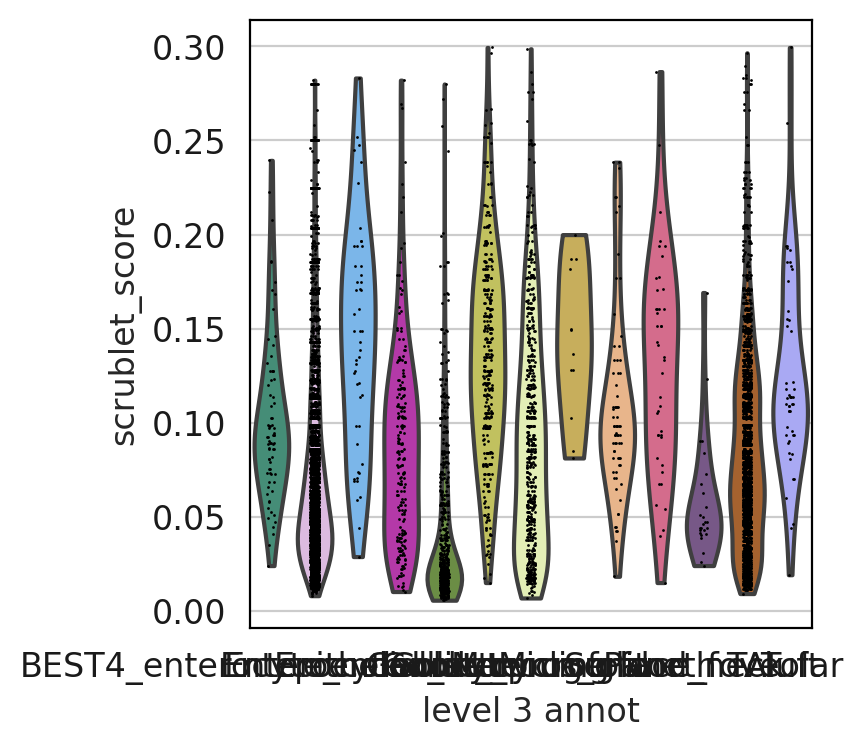

In [71]:
plt.rcParams['figure.figsize'] = [4,4]
sc.pl.violin(disease,keys=['scrublet_score'],groupby='level_3_annot',multi_panel=True,save='scrublet_score_allcelltypes.png')

In [77]:
disease.obs.pass_default

index
AAAGATGAGTCCAGGA-4918STDY7273964            False
AAAGATGTCTAACTTC-4918STDY7273964             True
AAAGCAATCTTGTCAT-4918STDY7273964            False
AAAGTAGAGAATGTTG-4918STDY7273964             True
AAAGTAGAGTCCAGGA-4918STDY7273964            False
                                            ...  
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX      NaN
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX      NaN
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX      NaN
TTTGGTTAGAGTACCG-1_16-GI4401_DUO_EPI_GEX      NaN
TTTGGTTTCGATGAGG-1_16-GI4401_DUO_EPI_GEX      NaN
Name: pass_default, Length: 30588, dtype: object

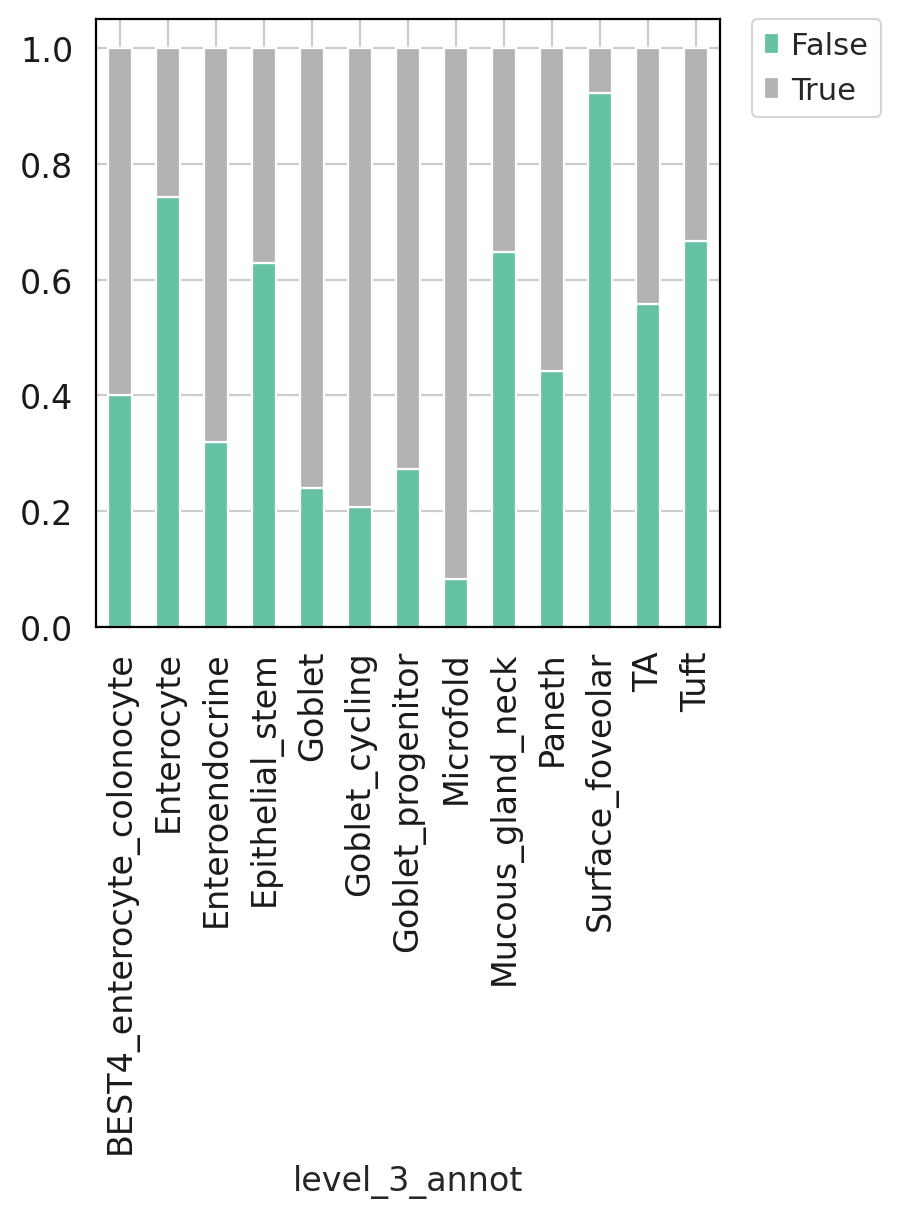

In [78]:
#Extended data 6i
tmp = pd.crosstab(disease.obs['level_3_annot'], disease.obs['pass_default'], normalize='index')
tmp.plot.bar(stacked=True,cmap='Set2').legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)